## This is made for calculating the resultant lenght or MRL of beacon trajectories. It needs to convert trajecotries from befor beaon to an array -shape = ( Beacon #, Seconds before *100, XYZ) - i.e 35,300,3 

In [1]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from numpy import median
from scipy.stats import ranksums

root = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Data/Raw/'
figures = 'C:/Users/Fabian/Desktop/Analysis/Multiple_trial_analysis/Figures/'


## 1. Import functions from previous notebooks - giving trajectories before beacon - improve to have the whole trajectory before beacon to the time when another beacon is reached - then uneven lenghts  - can make that as list of arrays, but numpy is not made for that 

In [2]:
from Data_analysis import *

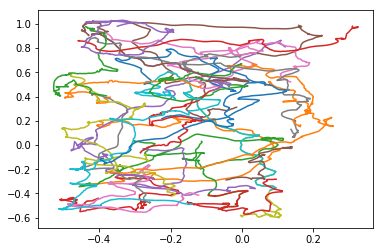

In [3]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1

dist=[]
norm_x,norm_y,norm_time = position_before_beacon_trigger_beacon(5,beacon_data,position_data)
for i in np.arange(len(norm_x)):
    plt.plot(norm_x[i],norm_y[i])
    #dist.append(calculate_Distance(norm_x[i],norm_y[i])) - cannot be indexed into ... 
    


## 2. create combined vector lenght from trajectory,  can make it normalized if needed. 


In [4]:
def position_before_beacon_trigger_beacon_array(seconds_back, beacon_data, position_data):
    """Take beacon data and returns XY and Time array defined in seconds before beacon """
    x_list=[]
    y_list=[]
    time_list=[] 
    beacon_travel2=[]
    index, enum  = get_index(beacon_data, position_data)
    for i in index:
        if i <= seconds_back*100:
            i = seconds_back*100+1
        x_list.append(position_data[1][int(i-(seconds_back*100)):i])
        y_list.append(position_data[3][int(i-(seconds_back*100)):i])
        time_list.append(position_data[0][int(i-(seconds_back*100)):i])
        k= np.asarray((time_list[0],x_list[0],y_list[0],))
        beacon_travel2.append(k)
        x_list=[]
        y_list=[]
        time_list=[]
    return np.asarray(beacon_travel2)
beacon_travel= position_before_beacon_trigger_beacon_array(3, beacon_data, position_data)

In [5]:
b= beacon_travel.reshape(300,3,35)
b[:,0,3]

array([ 1.58022119e+09,  1.58022119e+09,  1.58022119e+09,  1.51206583e-01,
        9.69275087e-02, -2.75419027e-01,  1.37080058e-01, -9.28799529e-03,
       -3.20821673e-01,  1.58022127e+09,  1.58022127e+09,  1.58022127e+09,
        7.30470717e-02, -9.20103211e-03, -3.35027486e-01, -1.32355839e-04,
       -2.96095252e-01, -3.23351383e-01,  1.58022128e+09,  1.58022128e+09,
        1.11925602e-03,  1.03333876e-01, -3.33527863e-01, -6.01220354e-02,
        7.55571276e-02, -2.84156442e-01,  1.58022131e+09,  1.58022131e+09,
        1.58022131e+09, -2.72339255e-01, -2.82969147e-01, -3.49717230e-01,
       -5.19803822e-01, -4.03477222e-01, -2.73961186e-01,  1.58022131e+09,
        1.58022132e+09,  1.58022132e+09, -3.83129478e-01, -9.87349227e-02,
       -2.44902261e-03,  2.43153065e-01,  6.64006829e-01,  1.58022138e+09,
        1.58022138e+09,  1.58022139e+09, -2.82120228e-01,  1.66324034e-01,
        4.66224253e-02,  8.50606263e-01,  9.56963181e-01,  7.56854951e-01,
        1.58022139e+09,  

In [6]:
beacon_travel[1,0,:] # this give just 200 times, but maybe they are off? 

array([1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
       1.58022127e+09, 1.58022127e+09, 1.58022127e+09, 1.58022127e+09,
      

### Looking at time if it is the correct array... - seems off beacause it is 3.3 seconds, instead of 3 seconds - more close to the 35 beacons - goign across a wrong axis? 

In [7]:
diff=[]
for i in range (299):
    diff.append(beacon_travel[1,0,i]-beacon_travel[1,0,i+1])
    
(sum(diff)) # so it is giving 5 seconds worth of trajectory? 

-4.980000019073486

In [8]:
len(beacon_travel[1,1,:])

300

In [9]:
print(beacon_travel.shape)

(35, 3, 300)


## Sanity check - checkt trajectories and how they look in real - here they equal - Question remaing why are time differences off?

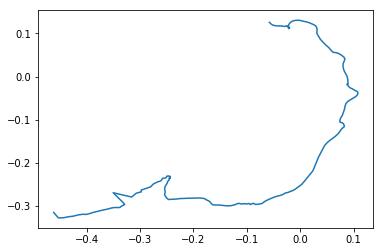

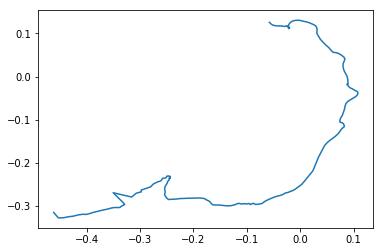

In [10]:
seconds_back = 3
index, enum  = get_index(beacon_data, position_data)
plt.plot(beacon_travel[1,1,:],beacon_travel[1,2,:]) # plotting trajectory of the second beacon...
plt.show()
plt.plot((position_data[1][index[1]-(seconds_back*100):index[1]]),(position_data[3][index[1]-(seconds_back*100):index[1]]))


## 3. create lenght of trajectory form start to end - i.e straight line 

In [11]:
straights=[]
longs=[]
for beacon in range(len(beacon_travel)):
    longs.append(calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:]))
    straights.append(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
print(longs)
print(straights)

[1.2397211335647451, 1.2018306619073373, 1.4122423275126603, 0.9672456671572004, 1.489453009476152, 1.5915187339625958, 0.988187351181918, 0.393022094947676, 1.40792497914724, 0.9750236039368166, 0.5268426404927636, 0.6117557294883438, 0.48559234939768886, 0.869025580083223, 0.6724514362682197, 0.5274075286903185, 1.0015720384333695, 0.5332948946747209, 0.7685009700201332, 0.8726225920057074, 0.5215931068022918, 0.7859409599041747, 0.7309870496317135, 0.6513412944874759, 0.9187906320599311, 0.5438801842097978, 0.8534342596130218, 1.1176759588121388, 0.9332334209015875, 0.986501516118875, 1.010290616562494, 0.976225687161691, 0.9164075706710695, 0.7137060524107198, 0.9540109540134509]
[0.7211462506984566, 0.5975192016674324, 0.47819023227721297, 0.26531471752364555, 0.9999158661882696, 0.29649974746526864, 0.11589386316157636, 0.19631880853433184, 1.1568550546471084, 0.06747341145379868, 0.2982396107088095, 0.39362472491529465, 0.08739488145815875, 0.24779496291438943, 0.245537521954913

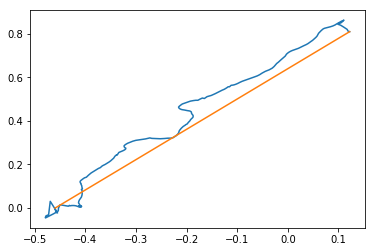

In [12]:
beacon = 4
plt.plot(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:])
plt.plot([beacon_travel[beacon,1,0], beacon_travel[beacon,1,-1]] ,([beacon_travel[beacon,2,0],beacon_travel[beacon,2,-1]]))
    

## Sanity check: ratios seemed to have very small differences. - not sure why, plottign them revesl ok trajectories  - NOw fixed! 

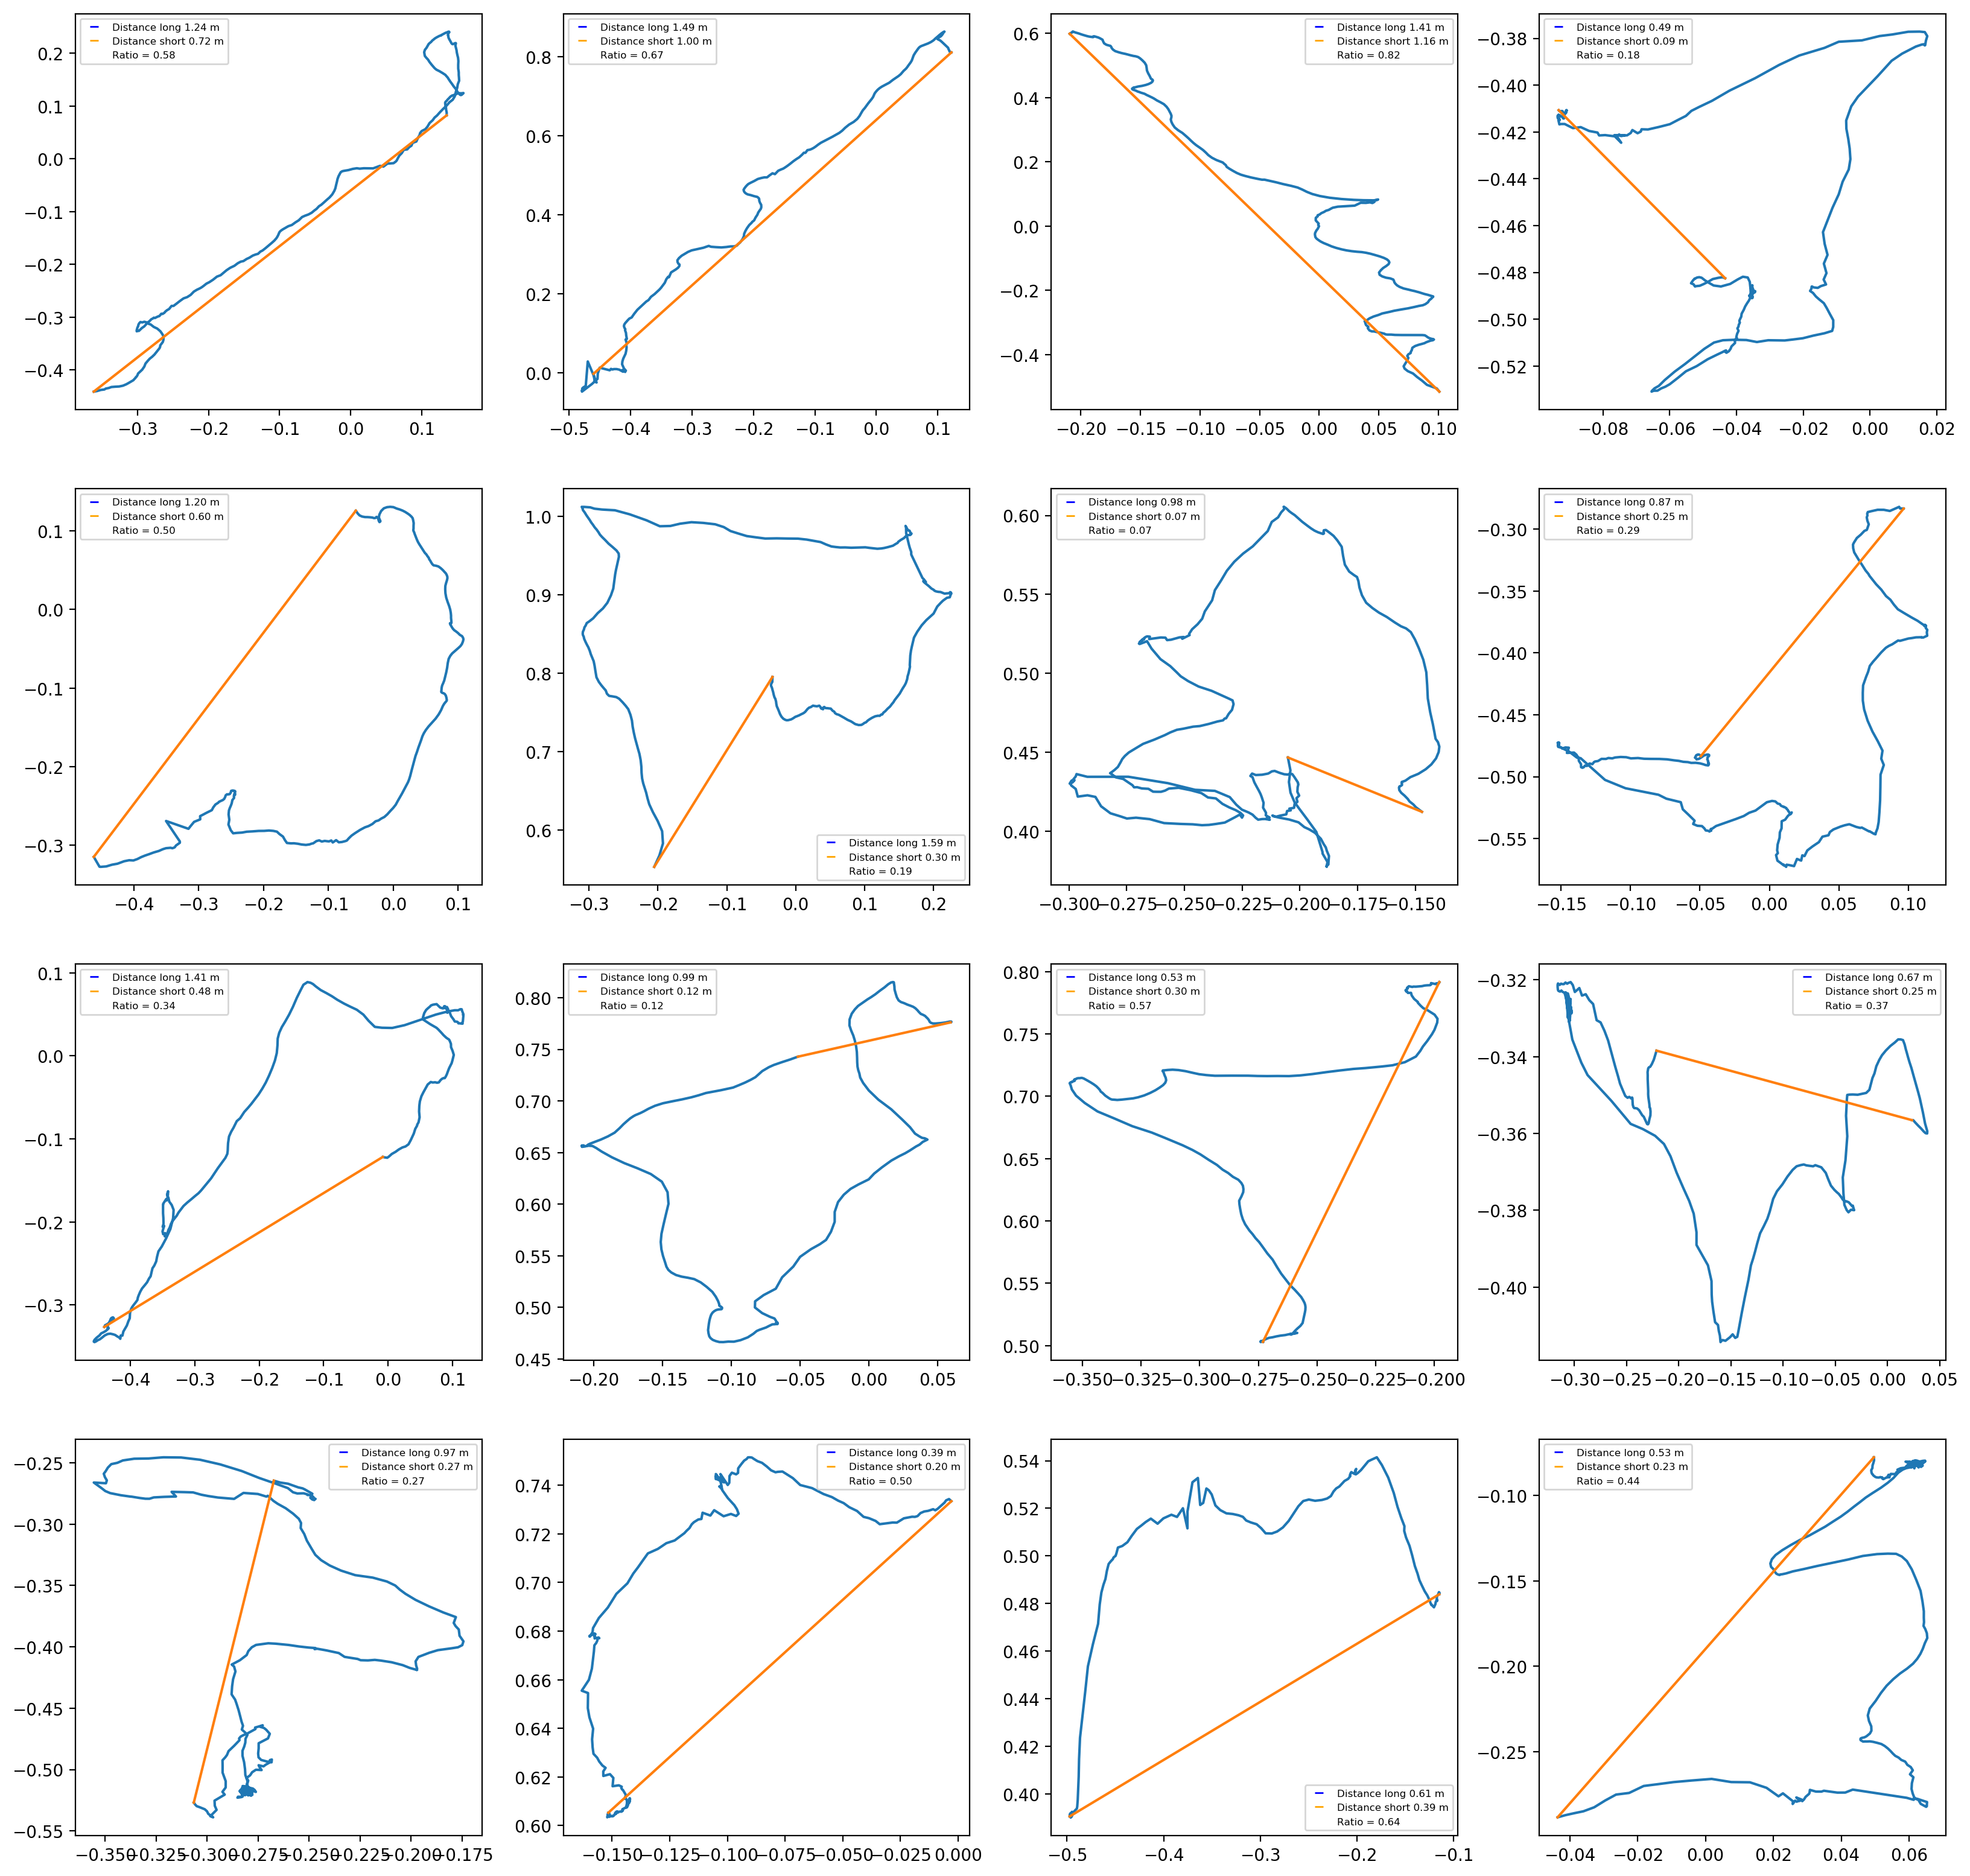

In [13]:
fig,ax = plt.subplots(4,4,figsize=(20,20),dpi=200)
num=0
h=0
for beacon in range(16): 
    s=(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
    
    l=calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:])
    
    ax[h][num].plot(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:])
    ax[h][num].plot([beacon_travel[beacon,1,0], beacon_travel[beacon,1,-1]] ,([beacon_travel[beacon,2,0],beacon_travel[beacon,2,-1]]))
    
    
    distl = mlines.Line2D([], [], marker='_',markersize=5,markerfacecolor="blue",
                            markeredgecolor="blue",linewidth = 0, label='Distance long %.2f m' %l)
    dists = mlines.Line2D([], [], marker='_',markersize=5,markerfacecolor="orange",
                            markeredgecolor="orange",linewidth = 0, label='Distance short %.2f m' %s)
    diff = mlines.Line2D([], [], marker=" ",linewidth = 0, label='Ratio = %.2f ' %(s/l))
    
        
    ax[h][num].legend(handles=[distl,dists,diff],loc='best',prop={'size': 6})
    
    l=0
    s=0
    h+=1
    if h % 4==0:
        num += 1
        h=0
plt.savefig('%s16_trajectories_2_sec._before_beacons_.png' %(figures), dpi = 100)    
plt.show()


## 4. combine the two arrays into one - 0th column lenght of trajectory, 1st column lenght of straight line 

In [14]:
resultant= (np.asarray(longs),np.asarray(straights))
np.asarray(resultant).shape

(2, 35)

In [15]:
resultant[1]

array([0.72114625, 0.5975192 , 0.47819023, 0.26531472, 0.99991587,
       0.29649975, 0.11589386, 0.19631881, 1.15685505, 0.06747341,
       0.29823961, 0.39362472, 0.08739488, 0.24779496, 0.24553752,
       0.23044567, 0.23037848, 0.33846152, 0.29609882, 0.36361471,
       0.36194853, 0.37779851, 0.35166297, 0.30813905, 0.50649107,
       0.11940127, 0.56371023, 0.70541811, 0.58280014, 0.65122968,
       0.75940229, 0.73484671, 0.56310604, 0.52980419, 0.09606758])

In [25]:
def ratios (list1,list2):
    resultant= (np.asarray(list1),np.asarray(list2))
    div = []
    for i in range(len(resultant[1])):
        div.append(resultant[1][i]/resultant[0][i])
    return np.asarray(div)
div = ratios(longs,straights)

## 5. Plot as a into a histogram,

0.4852900203770642
0.46488407982038094


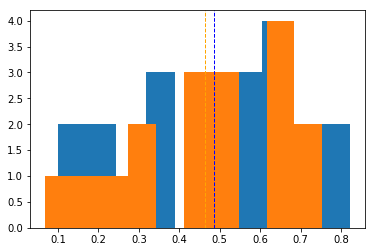

In [26]:
div=np.asarray(div)
plt.hist(div[::2])
plt.hist(div[1::2])
np.mean(div[::2])
plt.axvline(div[::2].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(div[1::2].mean(), color='orange', linestyle='dashed', linewidth=1)
print(div[0::2].mean())
print(div[1::2].mean())


## 6.Make a function out of it

#### This function takes beaocn and position and graphs the perentage of lenght of trajecotries for a visible and invisible beacon 



0.4852900203770642
0.46488407982038094


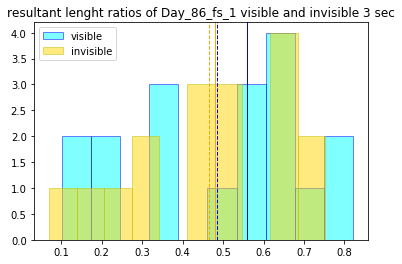

In [27]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1

def resultant_lenght_vis_invis(position_data, beacon_data,seconds_back,name):
    beacon_travel = position_before_beacon_trigger_beacon_array(seconds_back, beacon_data, position_data)
    straights=[]
    longs=[]
    for beacon in range(len(beacon_travel)):
        longs.append(calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:]))
        straights.append(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
    div = ratios(longs,straights)

    plt.hist(div[::2],alpha=.5,color='cyan', edgecolor='blue',label='visible')
    plt.hist(div[1::2],alpha=.5,color='gold', edgecolor='y', label='invisible')
    blue_line = mlines.Line2D([], [], color='blue', marker='_',
                          markersize=15, label='Blue stars')
    plt.legend()
    np.mean(div[::2])
    plt.axvline(div[::2].mean(), color='blue', linestyle='dashed', linewidth=1)
    plt.axvline(div[1::2].mean(), color='orange', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(div[::2]), color='blue', linestyle='solid', linewidth=1)
    plt.axvline(np.median(div[1::2]), color='orange', linestyle='solid', linewidth=1)
    #plt.axvline(np.std(div[::2]), color='blue', linestyle='dashdot', linewidth=1)
    #plt.axvline(np.std(div[1::2]), color='orange', linestyle='dashdot', linewidth=1)
    print(div[0::2].mean())
    print(div[1::2].mean())
    plt.title('resultant lenght ratios of %s visible and invisible %s sec'%(name,seconds_back))
    plt.savefig('%sresultant_lenght_ratios_%s_visible_invisible_%s.png' %(figures,seconds_back,name ), dpi = 100) 

    
resultant_lenght_vis_invis(position_data,beacon_data,3,'Day_86_fs_1')


0.49347385827093987
0.394206727884158


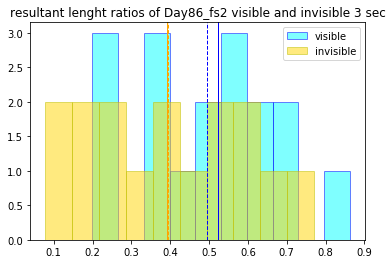

In [28]:
resultant_lenght_vis_invis(Day86_fs2 ,beacon_Day86_fs2,3,'Day86_fs2')

0.3918050483046605
0.44519153469238676


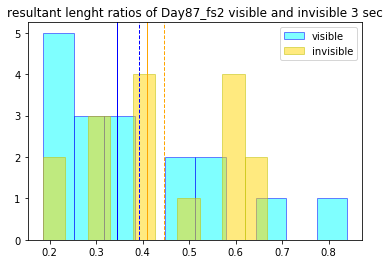

In [29]:
resultant_lenght_vis_invis(Day87_fs2 ,beacon_Day87_fs2,3,'Day87_fs2')

0.44254338305439506
0.45008032906447454


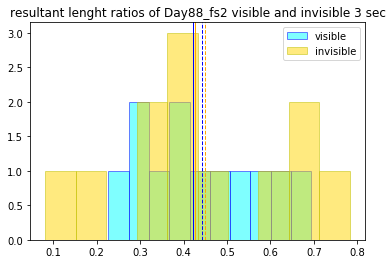

In [30]:
resultant_lenght_vis_invis(Day88_fs2 ,beacon_Day88_fs2,3,'Day88_fs2')

0.5123835304764198
0.42746515034854227


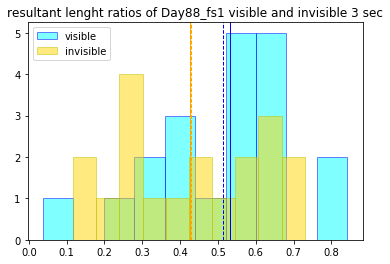

In [31]:
resultant_lenght_vis_invis(Day88_fs1 ,beacon_Day88_fs1,3,'Day88_fs1')

## 7. Calculate histogram over sessions 

In [32]:
beacons = [beacon_Day86_fs1,beacon_Day87_fs1,beacon_Day88_fs1,beacon_Day89_fs1,beacon_Day90_fs1,beacon_Day91_fs1,beacon_Day92_fs1,beacon_Day93_fs1]
beacons2 = [beacon_Day86_fs2,beacon_Day87_fs2,beacon_Day88_fs2,beacon_Day89_fs2,beacon_Day90_fs2,beacon_Day91_fs2,beacon_Day92_fs2,beacon_Day93_fs2]
list_of_days = [Day86_fs1,Day87_fs1,Day88_fs1,Day89_fs1,Day90_fs1,Day91_fs1,Day92_fs1,Day93_fs1]
list_of_days2 = [Day86_fs2,Day87_fs2,Day88_fs2,Day89_fs2,Day90_fs2,Day91_fs2,Day92_fs2,Day93_fs2]
Day_list = list_of_days+list_of_days2
Beacon_list = beacons+beacons2
len(list_of_days)== len(beacons) 

True

In [33]:
def resultant_lenght_vis_invis_all (list_of_days,beacon,seconds_back):
    div = []
    for index,(position,beaconz) in enumerate(zip (Day_list,Beacon_list)):  
        beacon_travel = position_before_beacon_trigger_beacon_array(seconds_back, beaconz, position)
        straights=[]
        longs=[]   
        for beacon in range(len(beacon_travel)):
            longs.append(calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:]))
            straights.append(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
        div.append(np.asarray((ratios(longs,straights))))
    return(np.asarray(div))

#     plt.hist(div[::2],alpha=.5,color='cyan', edgecolor='blue',label='visible')
#     plt.hist(div[1::2],alpha=.5,color='gold', edgecolor='y', label='invisible')
#     blue_line = mlines.Line2D([], [], color='blue', marker='_',
#                           markersize=15, label='Blue stars')
#     plt.legend()
#     np.mean(div[::2])
#     plt.axvline(div[::2].mean(), color='blue', linestyle='dashed', linewidth=1)
#     plt.axvline(div[1::2].mean(), color='orange', linestyle='dashed', linewidth=1)
#     plt.axvline(np.median(div[::2]), color='blue', linestyle='solid', linewidth=1)
#     plt.axvline(np.median(div[1::2]), color='orange', linestyle='solid', linewidth=1)
#     #plt.axvline(np.std(div[::2]), color='blue', linestyle='dashdot', linewidth=1)
#     #plt.axvline(np.std(div[1::2]), color='orange', linestyle='dashdot', linewidth=1)
#     print(div[0::2].mean())
#     print(div[1::2].mean())
#     plt.title('resultant lenght ratios of %s visible and invisible %s sec'%(name,seconds_back))


large_div = resultant_lenght_vis_invis_all(Day_list, Beacon_list,4)

In [34]:
large_div[1][1]

0.4135108231024887

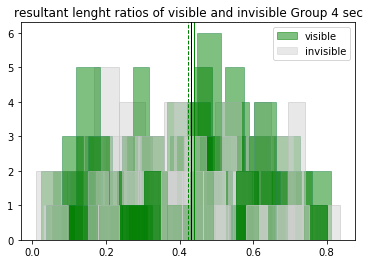

<Figure size 432x288 with 0 Axes>

In [35]:
large_mean_vis=[]
large_median_vis=[]
large_mean_invis=[]
large_median_invis=[]
for div in range(len(large_div)):
    plt.hist(large_div[div][::2],alpha=.5,color='g', edgecolor='seagreen')
    plt.hist(large_div[div][1::2],alpha=.5,color='lightgrey', edgecolor='silver')
    large_mean_vis.append(large_div[div][::2].mean())
    large_mean_invis.append(large_div[div][1::2].mean())
    large_median_vis.append(np.median(large_div[div][::2]))
    large_median_invis.append(np.median(large_div[div][1::2]))
plt.hist(large_div[div][::2],alpha=.5,color='g', edgecolor='g',label='visible')
plt.hist(large_div[div][1::2],alpha=.5,color='lightgrey', edgecolor='lightgrey',label='invisible')

plt.legend()
    #np.mean(large_div[div][::2])
plt.axvline(np.mean(np.asarray(large_mean_vis)), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(np.asarray(large_mean_invis)), color='black', linestyle='dashed', linewidth=1)
plt.axvline(np.median(np.asarray(large_median_vis)), color='g', linestyle='solid', linewidth=1)
plt.axvline(np.median(np.asarray(large_median_invis)), color='black', linestyle='solid', linewidth=1)
    #plt.axvline(np.std(div[::2]), color='blue', linestyle='dashdot', linewidth=1)
    #plt.axvline(np.std(div[1::2]), color='orange', linestyle='dashdot', linewidth=1)
plt.title('resultant lenght ratios of visible and invisible Group %s sec'%(seconds_back))
plt.show()
plt.savefig('%sresultant_lenght_ratios_%s_visible_invisible_all.png' %(figures,seconds_back, ), dpi = 100) 

RanksumsResult(statistic=-0.27103010417681, pvalue=0.7863678787119113)


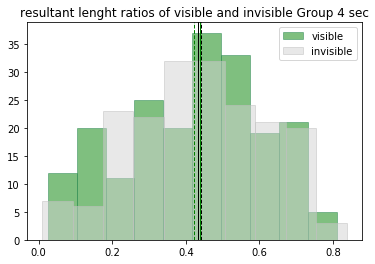

In [37]:
large_mean_vis=[]
large_median_vis=[]
large_mean_invis=[]
large_median_invis=[]
seconds_back=4

for div in range(len(large_div)):


    large_mean_vis.append(large_div[div][::2].mean())
    large_mean_invis.append(large_div[div][1::2].mean())
    large_median_vis.append(np.median(large_div[div][::2]))
    large_median_invis.append(np.median(large_div[div][1::2]))
vis = [item for sublist in large_div for item in sublist[::2]]  #cool list feature - flatening lists
invis = [item for sublist in large_div for item in sublist[1::2]]
print(ranksums(vis, invis))
    
plt.hist(vis,alpha=.5,color='g', edgecolor='seagreen',label='visible')
plt.hist(invis,alpha=.5,color='lightgrey', edgecolor='silver',label='invisible')

plt.legend()
    #np.mean(large_div[div][::2])
plt.axvline(np.mean(np.asarray(large_mean_vis)), color='g', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(np.asarray(large_mean_invis)), color='black', linestyle='dashed', linewidth=1)
plt.axvline(np.median(np.asarray(large_median_vis)), color='g', linestyle='solid', linewidth=1)
plt.axvline(np.median(np.asarray(large_median_invis)), color='black', linestyle='solid', linewidth=1)

    #plt.axvline(np.mean(np.asarray(vis)), color='blue', linestyle='dashdot', linewidth=1)
    #plt.axvline(np.std(div[1::2]), color='orange', linestyle='dashdot', linewidth=1)
plt.title('resultant lenght ratios of visible and invisible Group %s sec'%(seconds_back))
plt.savefig('%sresultant_lenght_ratios_%s_visible_invisible_all.png' %(figures,seconds_back, ), dpi = 200) 
plt.show()

### 8. Histogram over sessions - one clean function 

RanksumsResult(statistic=-0.27103010417681, pvalue=0.7863678787119113)
4


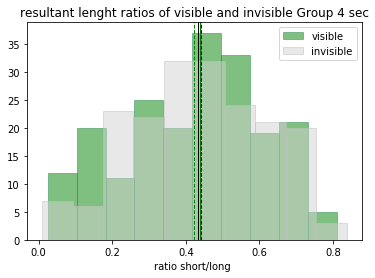

In [40]:
def histogram_ratio_all (list_of_days,beacon,seconds_back):

    large_div = resultant_lenght_vis_invis_all (list_of_days,beacon,seconds_back)


    large_mean_vis=[]
    large_median_vis=[]
    large_mean_invis=[]
    large_median_invis=[]

    for div in range(len(large_div)):

        #within group stats - not pooled 
        large_mean_vis.append(large_div[div][::2].mean())
        large_mean_invis.append(large_div[div][1::2].mean())
        large_median_vis.append(np.median(large_div[div][::2]))
        large_median_invis.append(np.median(large_div[div][1::2]))
    vis = [item for sublist in large_div for item in sublist[::2]]  #cool list feature - flatening lists
    invis = [item for sublist in large_div for item in sublist[1::2]]
    print(ranksums(vis, invis))
    plt.hist(vis,alpha=.5,color='g', edgecolor='seagreen',label='visible')
    plt.hist(invis,alpha=.5,color='lightgrey', edgecolor='silver',label='invisible')

    plt.legend()

    plt.axvline(np.mean(np.asarray(large_mean_vis)), color='g', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(np.asarray(large_mean_invis)), color='black', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(np.asarray(large_median_vis)), color='g', linestyle='solid', linewidth=1)
    plt.axvline(np.median(np.asarray(large_median_invis)), color='black', linestyle='solid', linewidth=1)
    plt.xlabel("ratio short/long ")
    print (seconds_back)
    plt.title('resultant lenght ratios of visible and invisible Group %s sec'% seconds_back)
    plt.savefig('%sresultant_lenght_ratios_%s_visible_invisible_all.png' %(figures,seconds_back), dpi = 200) 
    plt.show()
histogram_ratio_all (Day_list, Beacon_list , 4 )

RanksumsResult(statistic=0.5038494067811518, pvalue=0.6143672055912077)
3


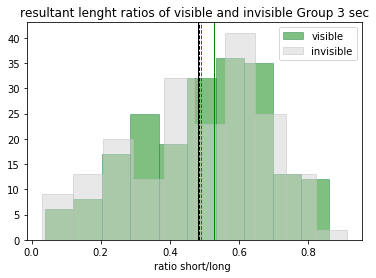

In [41]:
histogram_ratio_all (Day_list, Beacon_list,3)

RanksumsResult(statistic=-0.22126719980336293, pvalue=0.8248843877882177)
2


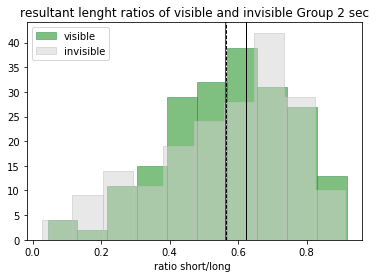

In [42]:
histogram_ratio_all (Day_list, Beacon_list,2)

RanksumsResult(statistic=-0.8681849566581751, pvalue=0.38529308819371855)
1


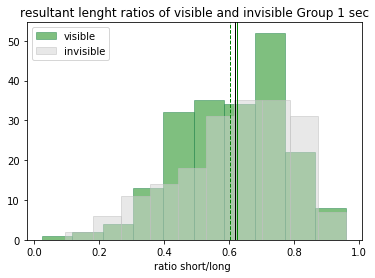

In [43]:
histogram_ratio_all (Day_list, Beacon_list,1)

RanksumsResult(statistic=-0.6913489214739613, pvalue=0.48934629502886473)
5


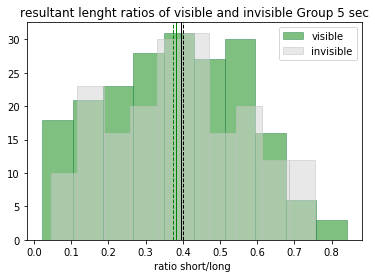

In [44]:
histogram_ratio_all (Day_list, Beacon_list,5)

RanksumsResult(statistic=-1.1827576021617512, pvalue=0.23690522805714087)
6


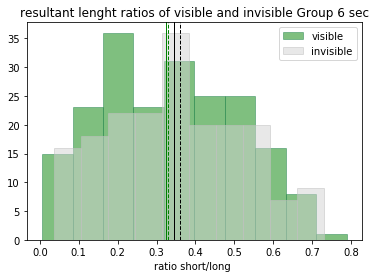

In [45]:
histogram_ratio_all (Day_list, Beacon_list,6)

RanksumsResult(statistic=-0.16528393238323497, pvalue=0.8687205049819975)
3.5


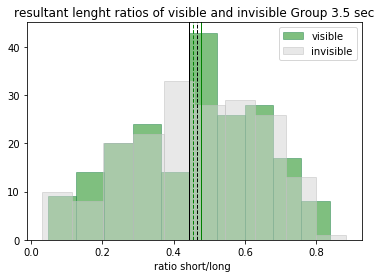

In [46]:
histogram_ratio_all (Day_list, Beacon_list,3.5)

203 190
RanksumsResult(statistic=0.5038494067811518, pvalue=0.6143672055912077)
3


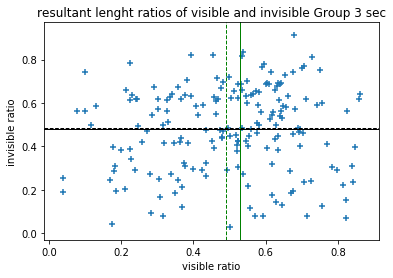

In [65]:
def scatter_ratio_all (list_of_days,beacon,seconds_back):

    large_div = resultant_lenght_vis_invis_all (list_of_days,beacon,seconds_back)


    large_mean_vis=[]
    large_median_vis=[]
    large_mean_invis=[]
    large_median_invis=[]

    for div in range(len(large_div)):

        #within group stats - not pooled 
        large_mean_vis.append(large_div[div][::2].mean())
        large_mean_invis.append(large_div[div][1::2].mean())
        large_median_vis.append(np.median(large_div[div][::2]))
        large_median_invis.append(np.median(large_div[div][1::2]))
    vis = [item for sublist in large_div for item in sublist[::2]]  #cool list feature - flatening lists
    invis = [item for sublist in large_div for item in sublist[1::2]]

    #plt.hist(vis,alpha=.5,color='g', edgecolor='seagreen',label='visible')
    #plt.hist(invis,alpha=.5,color='lightgrey', edgecolor='silver',label='invisible')

    print(len(vis),len(invis),)
    plt.scatter(vis[:189],invis[:189],marker="+")
    print(ranksums(vis, invis))

    plt.xlabel('visible ratio')
    plt.ylabel('invisible ratio')
    plt.axvline(np.mean(np.asarray(large_mean_vis)), color='g', linestyle='dashed', linewidth=1)
    plt.axhline(np.mean(np.asarray(large_mean_invis)), color='black', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(np.asarray(large_median_vis)), color='g', linestyle='solid', linewidth=1)
    plt.axhline(np.median(np.asarray(large_median_invis)), color='black', linestyle='solid', linewidth=1)
    print (seconds_back)
    plt.title('resultant lenght ratios of visible and invisible Group %s sec'% seconds_back)
    plt.savefig('%sresultant_lenght_ratios_scatter_%s_visible_invisible_all.png' %(figures,seconds_back), dpi = 200) 
    plt.show()
scatter_ratio_all (Day_list, Beacon_list , 3 )



## 9. Sham calculations 

1. Create random numbers based on the lenght of the recordign and the amount of beacons. 
2. Use the indexes to index into the data,  
3. Generate the histograms and resultant lenght for that data. 



In [51]:
import random as rn

In [53]:
Day86_fs2 = pd.read_csv(root+'position 20200128-160013.txt',sep=" ", header=None)
Day86_fs1 = pd.read_csv(root+'position 20200128-151826.txt',sep=" ", header=None)

beacon_Day86_fs2 = pd.read_csv(root+'beacons 20200128-160013.txt',sep=" ", header=None)
beacon_Day86_fs1 = pd.read_csv(root+'beacons 20200128-151826.txt',sep=" ", header=None)

beacon_data = beacon_Day86_fs1
position_data = Day86_fs1

print(len(beacon_data))
print(len(position_data))

rn.randrange(0, len(position_data),len(beacon_data))
my_randoms = rn.sample(range(1, len(position_data)), len(beacon_data))

print(len(my_randoms))
print(max(my_randoms))

35
107975
35
107963


In [55]:
def position_before_beacon_trigger_beacon_array_sham(seconds_back, beacon_data, position_data):
    """Take beacon data and returns XY and Time array defined in seconds before beacon """
    x_list=[]
    y_list=[]
    time_list=[] 
    beacon_travel2=[]
    randoms = rn.sample(range(1, len(position_data)), len(beacon_data))
    for i in randoms:
        if i <= seconds_back*100:
            i = seconds_back*100+1
        x_list.append(position_data[1][int(i-(seconds_back*100)):i])
        y_list.append(position_data[3][int(i-(seconds_back*100)):i])
        time_list.append(position_data[0][int(i-(seconds_back*100)):i])
        k= np.asarray((time_list[0],x_list[0],y_list[0],))
        beacon_travel2.append(k)
        x_list=[]
        y_list=[]
        time_list=[]
    return np.asarray(beacon_travel2)
beacon_travel= position_before_beacon_trigger_beacon_array_sham(3, beacon_data, position_data)

In [56]:
def resultant_lenght_vis_invis_all_sham (list_of_days,beacon,seconds_back):
    div = []
    for index,(position,beaconz) in enumerate(zip (Day_list,Beacon_list)):  
        beacon_travel = position_before_beacon_trigger_beacon_array_sham(seconds_back, beaconz, position)
        straights=[]
        longs=[]   
        for beacon in range(len(beacon_travel)):
            longs.append(calculate_Distance(beacon_travel[beacon,1,:],beacon_travel[beacon,2,:]))
            straights.append(math.sqrt((beacon_travel[beacon,1,0] - beacon_travel[beacon,1,-1]) ** 2 + (beacon_travel[beacon,2,0] - beacon_travel[beacon,2,-1]) ** 2))
        div.append(np.asarray((ratios(longs,straights))))
    return(np.asarray(div))

#     plt.hist(div[::2],alpha=.5,color='cyan', edgecolor='blue',label='visible')
#     plt.hist(div[1::2],alpha=.5,color='gold', edgecolor='y', label='invisible')
#     blue_line = mlines.Line2D([], [], color='blue', marker='_',
#                           markersize=15, label='Blue stars')
#     plt.legend()
#     np.mean(div[::2])
#     plt.axvline(div[::2].mean(), color='blue', linestyle='dashed', linewidth=1)
#     plt.axvline(div[1::2].mean(), color='orange', linestyle='dashed', linewidth=1)
#     plt.axvline(np.median(div[::2]), color='blue', linestyle='solid', linewidth=1)
#     plt.axvline(np.median(div[1::2]), color='orange', linestyle='solid', linewidth=1)
#     #plt.axvline(np.std(div[::2]), color='blue', linestyle='dashdot', linewidth=1)
#     #plt.axvline(np.std(div[1::2]), color='orange', linestyle='dashdot', linewidth=1)
#     print(div[0::2].mean())
#     print(div[1::2].mean())
#     plt.title('resultant lenght ratios of %s visible and invisible %s sec'%(name,seconds_back))


large_div_sham = resultant_lenght_vis_invis_all_sham(Day_list, Beacon_list,4)

3


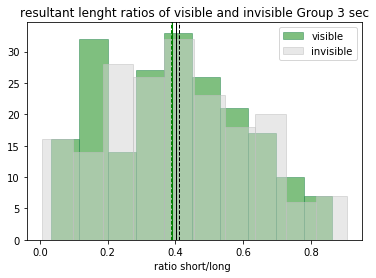

In [57]:
def histogram_ratio_all_sham  (list_of_days,beacon,seconds_back):

    large_div_sham = resultant_lenght_vis_invis_all_sham (list_of_days,beacon,seconds_back)


    large_mean_vis=[]
    large_median_vis=[]
    large_mean_invis=[]
    large_median_invis=[]

    for div in range(len(large_div)):

        #within group stats - not pooled 
        large_mean_vis.append(large_div_sham[div][::2].mean())
        large_mean_invis.append(large_div_sham[div][1::2].mean())
        large_median_vis.append(np.median(large_div_sham[div][::2]))
        large_median_invis.append(np.median(large_div_sham[div][1::2]))
    vis = [item for sublist in large_div_sham for item in sublist[::2]]  #cool list feature - flatening lists
    invis = [item for sublist in large_div_sham for item in sublist[1::2]]

    plt.hist(vis,alpha=.5,color='g', edgecolor='seagreen',label='visible')
    plt.hist(invis,alpha=.5,color='lightgrey', edgecolor='silver',label='invisible')

    plt.legend()

    plt.axvline(np.mean(np.asarray(large_mean_vis)), color='g', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(np.asarray(large_mean_invis)), color='black', linestyle='dashed', linewidth=1)
    plt.axvline(np.median(np.asarray(large_median_vis)), color='g', linestyle='solid', linewidth=1)
    plt.axvline(np.median(np.asarray(large_median_invis)), color='black', linestyle='solid', linewidth=1)
    plt.xlabel("ratio short/long ")
    print (seconds_back)
    plt.title('resultant lenght ratios of visible and invisible Group %s sec'% seconds_back)
    plt.savefig('%sresultant_lenght_ratios_%s_visible_invisible_all.png' %(figures,seconds_back), dpi = 200) 
    plt.show()
histogram_ratio_all_sham (Day_list, Beacon_list , 3 )

### 10. Bootstrapping 

In [58]:
def histogram_ratio_all_boot  (list_of_days,beacon,seconds_back):

    large_div_sham = resultant_lenght_vis_invis_all_sham (list_of_days,beacon,seconds_back)


    large_mean_vis=[]
    large_median_vis=[]
    large_mean_invis=[]
    large_median_invis=[]

    for div in range(len(large_div)):

        #within group stats - not pooled 
        large_mean_vis.append(large_div_sham[div][::2].mean())
        large_mean_invis.append(large_div_sham[div][1::2].mean())
        large_median_vis.append(np.median(large_div_sham[div][::2]))
        large_median_invis.append(np.median(large_div_sham[div][1::2]))
    vis = [item for sublist in large_div_sham for item in sublist[::2]]  #cool list feature - flatening lists
    invis = [item for sublist in large_div_sham for item in sublist[1::2]]

    #plt.hist(vis,alpha=.5,color='g', edgecolor='seagreen',label='visible')
    #plt.hist(invis,alpha=.5,color='lightgrey', edgecolor='silver',label='invisible')

    #plt.legend()

    mean_vis= np.mean(np.asarray(large_mean_vis)), 
    mean_invis = np.mean(np.asarray(large_mean_invis)), 
    median_vis = np.median(np.asarray(large_median_vis)), 
    median_invis = np.median(np.asarray(large_median_invis)),
    #print (seconds_back)
    return [mean_vis,mean_invis, median_vis,median_invis]
    
histogram_ratio_all_boot (Day_list, Beacon_list , 3 )

[(0.4018928919178065,),
 (0.3874320955665076,),
 (0.393174944693379,),
 (0.3862761117574839,)]

## Bootstrap - calculate means and sampled data over X times also for whatever times 

In [59]:
ave=[]
for i in range (100):
    ave.append(histogram_ratio_all_boot (Day_list, Beacon_list , 3 ))
    

In [60]:
def strapped_means (ave):
    ave_all = []
    mean_vis_boot =[]
    mean_invis_boot=[]
    median_vis_boot=[]
    median_invis_boot=[] 
    bins=25
    for i in range(len(ave)):
        mean_vis_boot.append(ave[i][0])
        mean_invis_boot.append(ave[i][1])
        median_vis_boot.append(ave[i][2])
        median_invis_boot.append(ave[i][3])
        
    np.mean(mean_vis_boot )
    
    plt.hist(mean_vis_boot,bins=bins)
    np.mean(mean_invis_boot)
    plt.hist(mean_invis_boot,bins=bins)
    np.median(np.asarray(median_vis_boot))
    plt.hist(median_vis_boot,bins=bins)
    np.median(median_invis_boot)
    plt.hist(median_invis_boot,bins=bins)
    return [np.mean(mean_vis_boot), np.mean(mean_invis_boot), np.median(np.asarray(median_vis_boot)),np.median(median_invis_boot)]

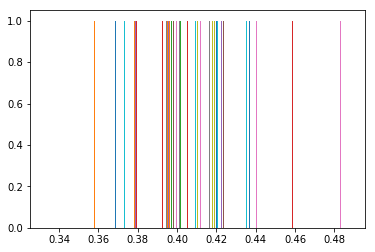

In [61]:
ave_all_boot= strapped_means(ave)

In [62]:
ave_all_boot




[0.40168320163294885,
 0.40233394142866324,
 0.4024784165115732,
 0.40573326889720873]

In [63]:
def histogram_ratio_all_nums  (list_of_days,beacon,seconds_back):

    large_div = resultant_lenght_vis_invis_all (list_of_days,beacon,seconds_back)


    large_mean_vis=[]
    large_median_vis=[]
    large_mean_invis=[]
    large_median_invis=[]

    for div in range(len(large_div)):

        #within group stats - not pooled 
        large_mean_vis.append(large_div[div][::2].mean())
        large_mean_invis.append(large_div[div][1::2].mean())
        large_median_vis.append(np.median(large_div[div][::2]))
        large_median_invis.append(np.median(large_div[div][1::2]))
    vis = [item for sublist in large_div for item in sublist[::2]]  #cool list feature - flatening lists
    invis = [item for sublist in large_div for item in sublist[1::2]]

    #plt.hist(vis,alpha=.5,color='g', edgecolor='seagreen',label='visible')
    #plt.hist(invis,alpha=.5,color='lightgrey', edgecolor='silver',label='invisible')

    #plt.legend()

    mean_vis= np.mean(np.asarray(large_mean_vis)), 
    mean_invis = np.mean(np.asarray(large_mean_invis)), 
    median_vis = np.median(np.asarray(large_median_vis)), 
    median_invis = np.median(np.asarray(large_median_invis)),
    #print (seconds_back)
    return [mean_vis,mean_invis, median_vis,median_invis]
    
ave_all = histogram_ratio_all_boot (Day_list, Beacon_list , 3 )

In [64]:
ave_all

[(0.4140478291889451,),
 (0.4143802251135573,),
 (0.4292944844211424,),
 (0.42892802345822467,)]